# Mouse retina neuron development
##  Identify cell type-specific gene regulatory networks by [spliceJAC](https://splicejac.readthedocs.io)

In [1]:
import scvelo as scv
import anndata
import splicejac as sp

## Load data

In [10]:
adata = anndata.read("mouse_retina.h5ad")

In [11]:
adata.obs['clusters']=adata.obs['Annotation']

## Preprocess the Data

In [12]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 25381 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


## Running spliceJAC

In [13]:
sp.tl.estimate_jacobian(adata, n_top_genes=50)

Filtered out 166 genes that are detected 20 counts (shared).
Extracted 50 highly variable genes.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Running quick regression...
Running subset regression on the PR cluster...
Running subset regression on the RGC cluster...
Running subset regression on the AC/HC cluster...
Running subset regression on the Neuroblast cluster...
Running subset regression on the Progenitor cluster...


## Visualize the context-specific interactions 
### plotting the gene-gene interaction jacobian matrices

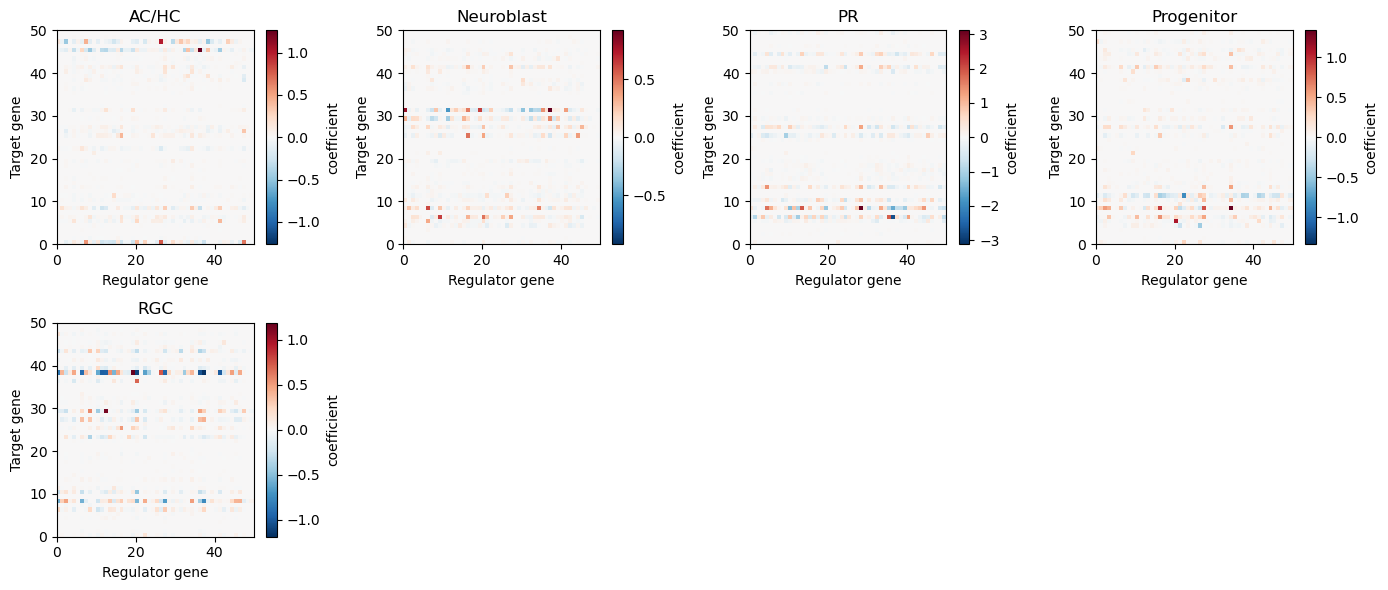

In [14]:
sp.pl.visualize_jacobian(adata,
                         panel_height=3,
                         panel_length=3.5,
                         pan_per_row=4,
                         fontsize=10,
                         cmap='RdBu_r',
                         showfig=True,
                         )

## Visualize the cell-type-specific GRNs

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


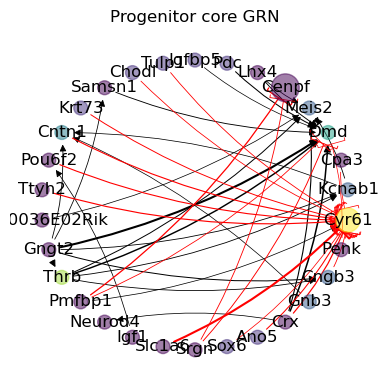

In [17]:
sp.pl.visualize_network(adata, 
                        'Progenitor', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=12, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=True,
                        plot_interactive=False,
                        showfig=True,
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


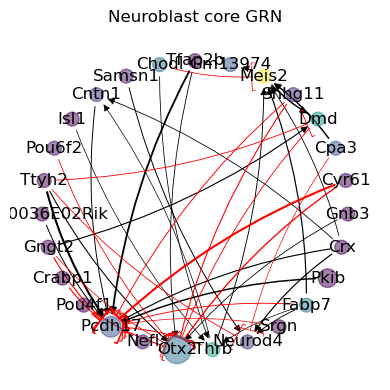

In [18]:
sp.pl.visualize_network(adata, 
                        'Neuroblast', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=12, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=True,
                        plot_interactive=False,
                        showfig=True,
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


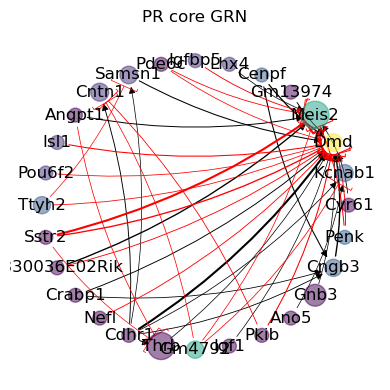

In [19]:
sp.pl.visualize_network(adata, 
                        'PR', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=12, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        conn_style='curved', 
                        colorbar=False,
                        fontweight='normal',
                        pos_style='circle',
                        title=True,
                        plot_interactive=False,
                        showfig=True,
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


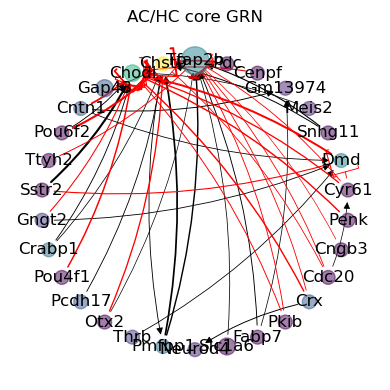

In [20]:
sp.pl.visualize_network(adata, 
                        'AC/HC', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=12, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        conn_style='curved', 
                        colorbar=False,
                        fontweight='normal',
                        pos_style='circle',
                        title=True,
                        plot_interactive=False,
                        showfig=True, 
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


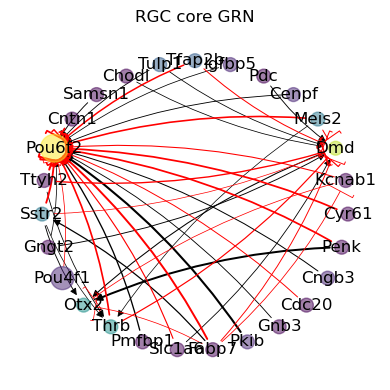

In [21]:
sp.pl.visualize_network(adata, 
                        'RGC', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=12, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        conn_style='curved', 
                        colorbar=False,
                        fontweight='normal',
                        pos_style='circle',
                        title=True,
                        plot_interactive=False,
                        showfig=True,  
                        figsize=(4, 4))